## Implementation of MAB using k=10 arms, 7 algorithms, 100 and 1000 runs each
#### Algorithms used:
1. UCB1
2. UCB1-Tuned
3. Epsilon-Greedy
4. Pursuit
5. Softmax (Boltzmann Exploration)
6. Reinforcement Comparison
7. Thompson Sampling


In [78]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [79]:
# np.random.seed(6)
# arms_random = np.random.uniform(0.1, 1, 10)
# arms_random = np.round_(arms_random, decimals=1)

# arms_fixed = np.arange(0.1, 1.1, 0.1)

# print("Array of 10 arms with random winning probabilities: \n", arms_random)
# print("\nArray of 10 arms with incrementally fixed winning probabilities: \n", arms_fixed)

In [80]:
#e.g. of normal dist NOT BOUNDED, sample of 10 numbers
mu, sigma = 0.5, 0.01 #mean, stddev
s1 = np.random.normal(mu, sigma, 10)
s1

array([0.50686867, 0.49863128, 0.51392828, 0.48978759, 0.50251447,
       0.50421783, 0.51231409, 0.49861866, 0.50292699, 0.50737834])

In [81]:
#e.g. of normal dist BOUNDED between 0 and 1, sample of 10 numbers
lower, upper = 0, 1
mu, sigma = 0.5, 0.1
N = 10
s2 = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
s2

array([0.47839467, 0.47841861, 0.52499459, 0.72252437, 0.48279456,
       0.42868211, 0.44288743, 0.44208954, 0.45501873, 0.47408419])

In [82]:
#e.g. trying arms with different types of distributions
# cur = 0
# sample_prelim = []
# sample_result = []

# arr = np.arange(0.1, 1.1, 0.1)

# for i in range(10):
#     cur = np.random.choice(arr)
#     sample_prelim = np.append(sample_prelim, cur)
    
# print("sample_prelim: ", sample_prelim)
# #print("\n")
    
# #arm1 dist
# if sample_prelim.item(0) < 0.5:  
#     arm1 = 0     #40% chance of 0
# else:  
#     arm1 = 1     #60% chance of 1
# print("arm1: ", arm1)

# #arm2 dist
# arm2 = sample_prelim.item(1) #uniform dist
# arm2 = int(arm2)
# print("arm2: ", arm2)

# #arm3 dist
# if sample_prelim.item(2) < 0.4:  
#     arm3 = 0.2    #30% chance of 0.2
# elif sample_prelim.item(2) == 0.4:  
#     arm3 = 0.5    #10% chance of 0.5
# else:  
#     arm3 = 0.8    #60% chance of 0.8
# print("arm3: ", arm3)

# #arm4 dist
# if sample_prelim.item(3) < 0.6:  
#     arm4 = 2*sample_prelim.item(3) #50% chance of doubled reward
# else:  
#     arm4 = sample_prelim.item(3)   #50% chance unchanged
# print("arm4: ", arm4)

# #arm5 dist
# arm5 = sample_prelim.item(4) #uniform dist
# arm5 = int(arm5)
# print("arm5: ", arm5)

# #arm6 dist
# arm6 = 0.2 #bad arm, always low reward
# print("arm6: ", arm6)

# #arm7 dist
# arm7 = 0.8 #good arm, always reasonably high reward
# print("arm7: ", arm7)

# #arm8 dist
# lower = 0    #normal dist between 0 and 1
# upper = 1
# mu = 0.5
# sigma = 0.1
# arm8 = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=1).item(0)
# print("arm8: ", arm8)

# #arm9 dist
# lower = 0.2    #normal dist between 0.2 and 0.8
# upper = 0.8
# mu = 0.5
# sigma = 0.1
# arm9 = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=1).item(0)
# print("arm9: ", arm9)

# #arm10 dist
# lower = 0.5    #normal dist between 0.5 and 1, high mean
# upper = 1
# mu = 0.8
# sigma = 0.1
# arm10 = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=1).item(0)
# print("arm10: ", arm10)

# sample_result = [arm1, arm2, arm3, arm4, arm5, arm6, arm7, arm8, arm9, arm10]
# print("\nsample_result: ", sample_result)

#### UCB1

In [83]:
# original algorithm, 100 runs
# note: UCB1 has logarithmic regret (i.e. the regret changes according to log(t), so it gets smaller asymptotically)
N=100
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0.5)/0.2,(upper-0.5)/0.2,loc=0.5,scale=0.2,size=N)    #mu, sigma = 0.5, 0.2
a2 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a3 = scipy.stats.truncnorm.rvs((lower-0.4)/0.1,(upper-0.4)/0.1,loc=0.4,scale=0.1,size=N)    #mu, sigma = 0.4, 0.1
a4 = scipy.stats.truncnorm.rvs((lower-0.6)/0.2,(upper-0.6)/0.2,loc=0.6,scale=0.2,size=N)    #mu, sigma = 0.6, 0.2
a5 = scipy.stats.truncnorm.rvs((lower-0.5)/1,(upper-0.5)/1,loc=0.5,scale=1,size=N)          #mu, sigma = 0.5, 1
a6 = scipy.stats.truncnorm.rvs((lower-0.7)/0.08,(upper-0.7)/0.08,loc=0.7,scale=0.08,size=N) #mu, sigma = 0.7, 0.08
a7 = scipy.stats.truncnorm.rvs((lower-0.4)/0.01,(upper-0.4)/0.01,loc=0.4,scale=0.01,size=N) #mu, sigma = 0.4, 0.01
a8 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a9 = scipy.stats.truncnorm.rvs((lower-0.65)/0.007,(upper-0.65)/0.007,loc=0.65,scale=0.007,size=N)#mu, sigma = 0.65, 0.007
a10 = scipy.stats.truncnorm.rvs((lower-0.6)/0.9,(upper-0.6)/0.9,loc=0.6,scale=0.9,size=N)   #mu, sigma = 0.6, 0.9

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows

,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.265151,0.431144,0.398531,0.519458,0.916553,0.878078,0.403915,0.194611,0.636382,0.324501
1,2,0.406233,0.488003,0.379041,0.460766,0.138456,0.856500,0.417267,0.243212,0.653736,0.744684
2,3,0.616318,0.210286,0.428241,0.468265,0.826957,0.793507,0.410049,0.503878,0.648242,0.299249
3,4,0.135177,0.363145,0.417739,0.637586,0.882258,0.800718,0.392756,0.132690,0.642492,0.537390
4,5,0.236893,0.171169,0.308324,0.621242,0.525604,0.738557,0.393310,0.346245,0.645186,0.539861


Text(0.5, 1.0, 'Distribution of Rewards for Each Arm')

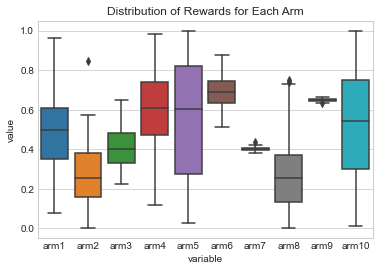

In [84]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10']]))
plt.title("Distribution of Rewards for Each Arm")

In [85]:
#implementing UCB1
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

In [86]:
for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #make large value
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

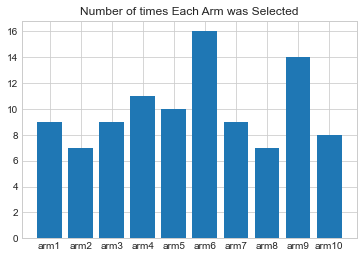

In [87]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  20.221514049683677


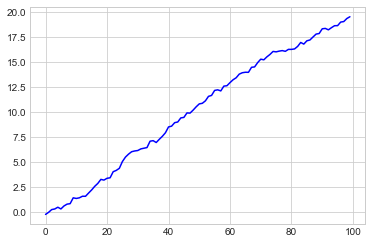

In [88]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr

plt.plot(regret_arr,color = 'b')
plt.show()

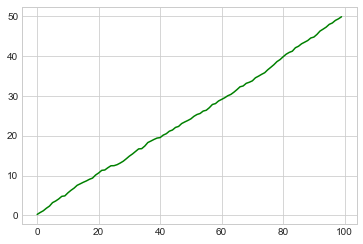

In [89]:
reward_arr = UCB_cumu_reward

plt.plot(reward_arr,color = 'g')
plt.show()

In [90]:
# original algorithm, 1000 runs
# note: UCB1 has logarithmic regret (i.e. the regret changes according to log(t), so it gets smaller asymptotically)
N=1000
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0.5)/0.2,(upper-0.5)/0.2,loc=0.5,scale=0.2,size=N)    #mu, sigma = 0.5, 0.2
a2 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a3 = scipy.stats.truncnorm.rvs((lower-0.4)/0.1,(upper-0.4)/0.1,loc=0.4,scale=0.1,size=N)    #mu, sigma = 0.4, 0.1
a4 = scipy.stats.truncnorm.rvs((lower-0.6)/0.2,(upper-0.6)/0.2,loc=0.6,scale=0.2,size=N)    #mu, sigma = 0.6, 0.2
a5 = scipy.stats.truncnorm.rvs((lower-0.5)/1,(upper-0.5)/1,loc=0.5,scale=1,size=N)          #mu, sigma = 0.5, 1
a6 = scipy.stats.truncnorm.rvs((lower-0.7)/0.08,(upper-0.7)/0.08,loc=0.7,scale=0.08,size=N) #mu, sigma = 0.7, 0.08
a7 = scipy.stats.truncnorm.rvs((lower-0.4)/0.01,(upper-0.4)/0.01,loc=0.4,scale=0.01,size=N) #mu, sigma = 0.4, 0.01
a8 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a9 = scipy.stats.truncnorm.rvs((lower-0.65)/0.007,(upper-0.65)/0.007,loc=0.65,scale=0.007,size=N)#mu, sigma = 0.65, 0.007
a10 = scipy.stats.truncnorm.rvs((lower-0.6)/0.9,(upper-0.6)/0.9,loc=0.6,scale=0.9,size=N)   #mu, sigma = 0.6, 0.9

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows


,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.333223,0.174916,0.390454,0.720620,0.932066,0.606881,0.373102,0.394380,0.649169,0.377368
1,2,0.055006,0.149017,0.366288,0.568414,0.266747,0.608350,0.384623,0.126922,0.660623,0.533172
2,3,0.331332,0.061322,0.428637,0.586245,0.298710,0.659986,0.388944,0.132409,0.647797,0.611017
3,4,0.855476,0.012005,0.344684,0.803934,0.420805,0.595051,0.402329,0.146254,0.641968,0.244485
4,5,0.386159,0.491146,0.574208,0.819026,0.779417,0.727965,0.408548,0.386745,0.633997,0.330706


Text(0.5, 1.0, 'Distribution of Rewards for Each Arm')

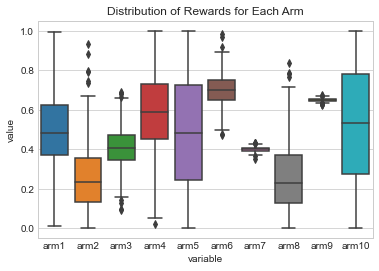

In [91]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10']]))
plt.title("Distribution of Rewards for Each Arm")

In [92]:
#implementing UCB1, 1000 runs
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #make large value
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

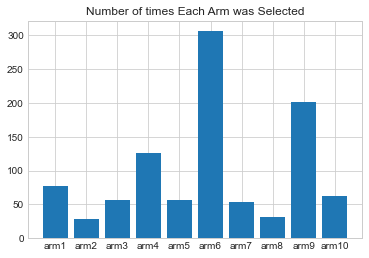

In [93]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  134.2046708055451


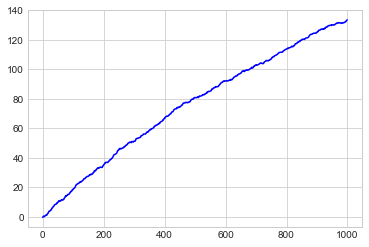

In [94]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: due to 1000 runs, one can see the regret becoming logarithmic

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr1 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr1

plt.plot(regret_arr1,color = 'b')
plt.show()

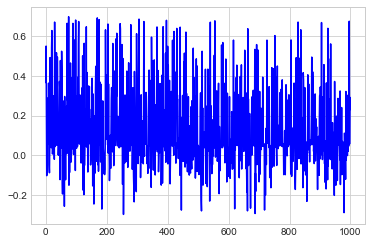

In [95]:
regret_not_cumu = np.ones(rounds)*0.7 - hist_UCB_rewards

plt.plot(regret_not_cumu,color = 'b')
plt.show()

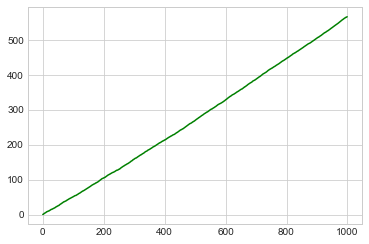

In [96]:
reward_arr1 = UCB_cumu_reward

plt.plot(reward_arr1, color = 'g')
plt.show()

In [97]:
# modified algorithm for comparison
# factor 2 replaced with 1 inside sqrt

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

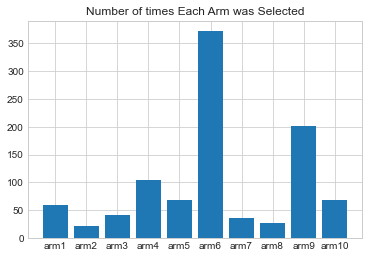

In [98]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  102.97804565820604


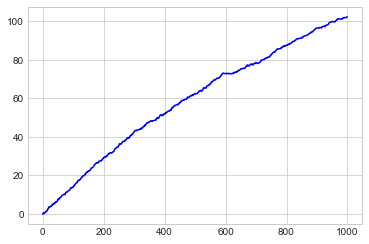

In [99]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with factor 2 removed, the regret is actually less, so algorithm performs better
#This is because the factor 2 weights the exploration term

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr2 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr2

plt.plot(regret_arr2,color = 'b')
plt.show()

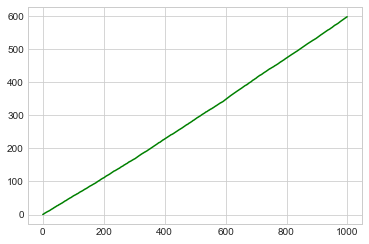

In [100]:
reward_arr2 = UCB_cumu_reward

plt.plot(reward_arr2,color = 'g')
plt.show()

In [101]:
# modified algorithm for comparison
# factor 2 replaced with 1/4 inside sqrt

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(0.25*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Total regret after N rounds:  46.21853230037607


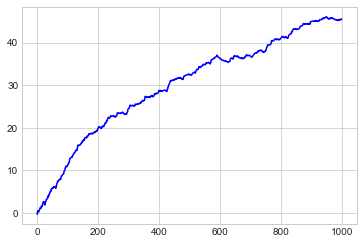

In [102]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with factor 2 removed, the regret is actually less, so algorithm performs better
#This is because the factor 2 weights the exploration term

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr2b = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr2b

plt.plot(regret_arr2b,color = 'b')
plt.show()

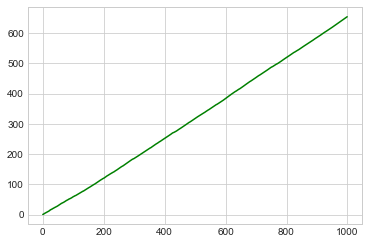

In [103]:
reward_arr2b = UCB_cumu_reward

plt.plot(reward_arr2b,color = 'g')
plt.show()

In [104]:
# modified algorithm for comparison
# mu weighted by 1.5; factor 2 restored

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = 1.5*mu + math.sqrt(2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Total regret after N rounds:  95.46046700487886


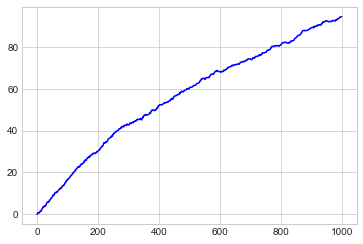

In [105]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr3b = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr3b

plt.plot(regret_arr3b,color = 'b')
plt.show()

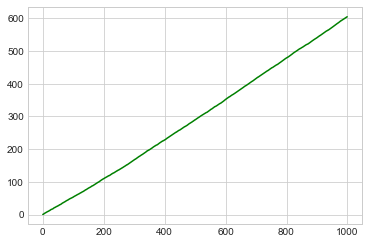

In [106]:
reward_arr3b = UCB_cumu_reward

plt.plot(reward_arr3b,color = 'g')
plt.show()

In [107]:
# modified algorithm for comparison
# ln(t) replaced with simply t in numerator inside square root

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(2*(t)/N[a]) 
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

In [108]:
df.values[t, arm_selected+1]

0.09397400161534093

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

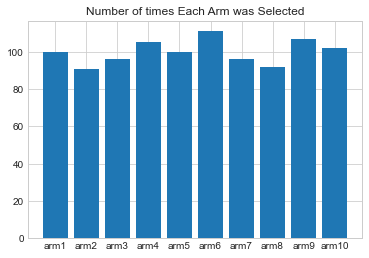

In [109]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  209.51968773234438


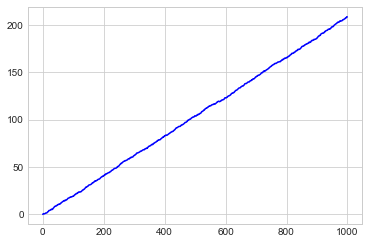

In [110]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with ln(t) replaced with just (t), the regret is larger
#weighting exploration term more heavily

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr3 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr3

plt.plot(regret_arr3,color = 'b')
plt.show()

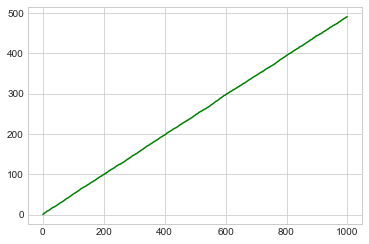

In [111]:
reward_arr3 = UCB_cumu_reward

plt.plot(reward_arr3,color = 'g')
plt.show()

#### UCB1-Tuned

In [72]:
# original algorithm, 100 runs
N=100
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0.5)/0.2,(upper-0.5)/0.2,loc=0.5,scale=0.2,size=N)    #mu, sigma = 0.5, 0.2
a2 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a3 = scipy.stats.truncnorm.rvs((lower-0.4)/0.1,(upper-0.4)/0.1,loc=0.4,scale=0.1,size=N)    #mu, sigma = 0.4, 0.1
a4 = scipy.stats.truncnorm.rvs((lower-0.6)/0.2,(upper-0.6)/0.2,loc=0.6,scale=0.2,size=N)    #mu, sigma = 0.6, 0.2
a5 = scipy.stats.truncnorm.rvs((lower-0.5)/1,(upper-0.5)/1,loc=0.5,scale=1,size=N)          #mu, sigma = 0.5, 1
a6 = scipy.stats.truncnorm.rvs((lower-0.7)/0.08,(upper-0.7)/0.08,loc=0.7,scale=0.08,size=N) #mu, sigma = 0.7, 0.08
a7 = scipy.stats.truncnorm.rvs((lower-0.4)/0.01,(upper-0.4)/0.01,loc=0.4,scale=0.01,size=N) #mu, sigma = 0.4, 0.01
a8 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a9 = scipy.stats.truncnorm.rvs((lower-0.65)/0.007,(upper-0.65)/0.007,loc=0.65,scale=0.007,size=N)#mu, sigma = 0.65, 0.007
a10 = scipy.stats.truncnorm.rvs((lower-0.6)/0.9,(upper-0.6)/0.9,loc=0.6,scale=0.9,size=N)   #mu, sigma = 0.6, 0.9

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows

,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.152247,0.088806,0.209147,0.624413,0.379993,0.620069,0.387864,0.244669,0.641374,0.488219
1,2,0.572972,0.167266,0.484887,0.322041,0.250768,0.644609,0.400782,0.128143,0.638548,0.492151
2,3,0.575099,0.259628,0.457452,0.864314,0.773478,0.714997,0.400586,0.213798,0.664099,0.555442
3,4,0.431080,0.185728,0.488692,0.439945,0.689884,0.656155,0.398176,0.120969,0.646883,0.407147
4,5,0.944674,0.358930,0.163575,0.654205,0.281264,0.749756,0.412205,0.121464,0.646172,0.563347


In [73]:
#implementing UCB1-Tuned, 100 runs
rounds = len(df.index) #number of rounds; 
k = 10 #number of arms
mu = 0 #initialize to 0, the empirical mean
N = np.zeros((k,), dtype=int) #num of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            x_i = df.values[t, a] #current reward in round t for arm a
            #for i in np.arange(1, N[a]):    #check
                #dev = sum((x_i-mu)**2)  #check
                #i = i+1
            dev = (x_i-mu)**2
            var = dev/(N[a])   #check
            V_i = var + math.sqrt(2*math.log(t)/N[a])
            ucb_value = mu + math.sqrt((math.log(t)/N[a])*min(1/4,V_i))
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)
    

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

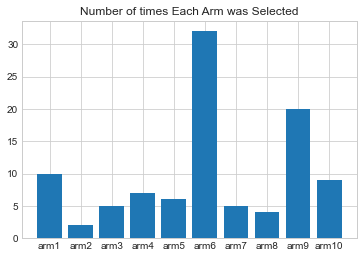

In [74]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  12.98828126753564


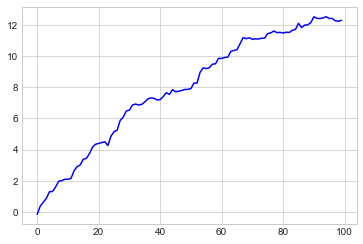

In [75]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr

plt.plot(regret_arr,color = 'b')
plt.show()

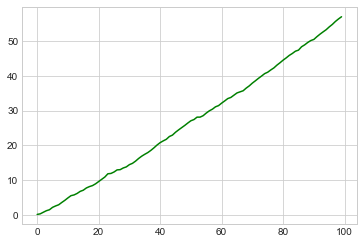

In [76]:
reward_arr = UCB_cumu_reward

plt.plot(reward_arr,color = 'g')
plt.show()

In [77]:
# original algorithm, 1000 runs
N=1000
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0.5)/0.2,(upper-0.5)/0.2,loc=0.5,scale=0.2,size=N)    #mu, sigma = 0.5, 0.2
a2 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a3 = scipy.stats.truncnorm.rvs((lower-0.4)/0.1,(upper-0.4)/0.1,loc=0.4,scale=0.1,size=N)    #mu, sigma = 0.4, 0.1
a4 = scipy.stats.truncnorm.rvs((lower-0.6)/0.2,(upper-0.6)/0.2,loc=0.6,scale=0.2,size=N)    #mu, sigma = 0.6, 0.2
a5 = scipy.stats.truncnorm.rvs((lower-0.5)/1,(upper-0.5)/1,loc=0.5,scale=1,size=N)          #mu, sigma = 0.5, 1
a6 = scipy.stats.truncnorm.rvs((lower-0.7)/0.08,(upper-0.7)/0.08,loc=0.7,scale=0.08,size=N) #mu, sigma = 0.7, 0.08
a7 = scipy.stats.truncnorm.rvs((lower-0.4)/0.01,(upper-0.4)/0.01,loc=0.4,scale=0.01,size=N) #mu, sigma = 0.4, 0.01
a8 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a9 = scipy.stats.truncnorm.rvs((lower-0.65)/0.007,(upper-0.65)/0.007,loc=0.65,scale=0.007,size=N)#mu, sigma = 0.65, 0.007
a10 = scipy.stats.truncnorm.rvs((lower-0.6)/0.9,(upper-0.6)/0.9,loc=0.6,scale=0.9,size=N)   #mu, sigma = 0.6, 0.9

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows

,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.488860,0.609372,0.429206,0.725587,0.465357,0.641749,0.400873,0.365773,0.650589,0.145024
1,2,0.812179,0.298862,0.374573,0.931956,0.309245,0.682731,0.408373,0.276332,0.650657,0.653005
2,3,0.264258,0.141468,0.368822,0.815312,0.417164,0.653692,0.401198,0.231666,0.647447,0.938922
3,4,0.368688,0.543062,0.391946,0.582221,0.237363,0.658978,0.389691,0.508143,0.653646,0.602391
4,5,0.046088,0.360101,0.189340,0.790895,0.155462,0.592987,0.391126,0.282029,0.650389,0.465404


In [35]:
#implementing UCB1-Tuned, 1000 runs
rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros((k,), dtype=int) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            #x_i = df.values[t, a] #current reward in round t for arm a
            #for i in range(N[a]):    #check
                #dev = sum((int(df.values[t, a])-int(mu))**2)  #check
            dev = (df.values[t, a]-mu)**2
            var = dev/(N[a])   #check
            V_i = var + math.sqrt(2*math.log(t)/N[a])
            ucb_value = mu + math.sqrt((math.log(t)/N[a])*min(1/4,V_i))
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)
    

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

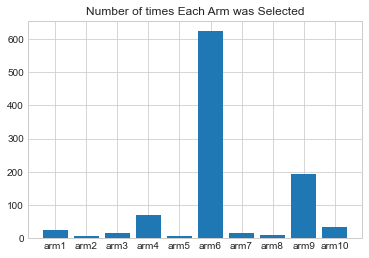

In [36]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  57.80581017392808


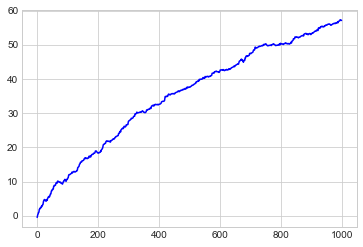

In [792]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: UCB1-Tuned regret is drastically better than UCB1
#clearly logarithmic

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr4 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr4

plt.plot(regret_arr4,color = 'b')
plt.show()

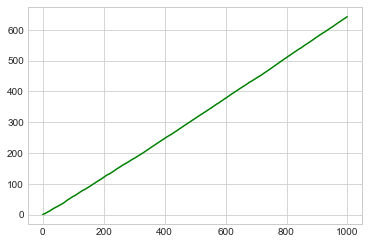

In [793]:
reward_arr4 = UCB_cumu_reward

plt.plot(reward_arr4,color = 'g')
plt.show()

In [808]:
# modified algorithm for comparison
# replace min(1/4, V) with min(1, V)

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros((k,), dtype=int) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            #x_i = df.values[t, a] #current reward in round t for arm a
            #for i in range(N[a]):    #check
                #dev = sum((int(df.values[t, a])-int(mu))**2)  #check
            dev = (df.values[t, a]-mu)**2
            var = dev/(N[a])   #check
            V_i = var + math.sqrt(2*math.log(t)/N[a])
            ucb_value = mu + math.sqrt((math.log(t)/N[a])*min(1,V_i))
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

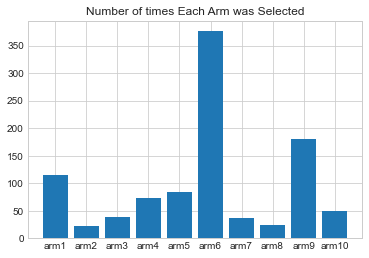

In [809]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  107.69726361637015


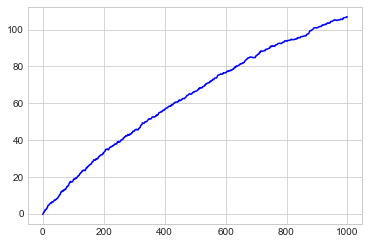

In [810]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with 1/4 replaced by 1, the UCB1-Tuned regret is still better than UCB1, but not as substantial an improvement
#clearly logarithmic

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr5 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr5

plt.plot(regret_arr5,color = 'b')
plt.show()

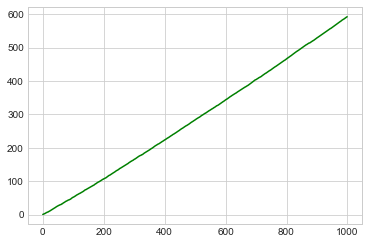

In [811]:
reward_arr5 = UCB_cumu_reward

plt.plot(reward_arr5,color = 'g')
plt.show()

In [812]:
# modified algorithm for comparison
# replace min(1/4, V) with min(1/2, V)

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros((k,), dtype=int) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            #x_i = df.values[t, a] #current reward in round t for arm a
            #for i in range(N[a]):    #check
                #dev = sum((int(df.values[t, a])-int(mu))**2)  #check+
            dev = (df.values[t, a]-mu)**2
            var = dev/(N[a])   #check
            V_i = var + math.sqrt(2*math.log(t)/N[a])
            ucb_value = mu + math.sqrt((math.log(t)/N[a])*min(1/2,V_i))
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

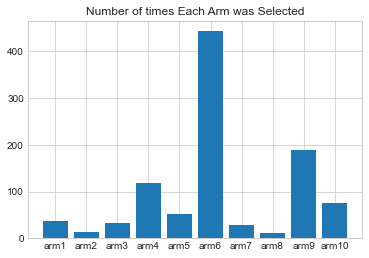

In [813]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  83.61914829222962


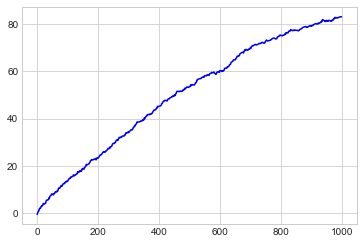

In [814]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with 1/4 replaced by 1/2, the UCB1-Tuned regret is still better than UCB1
#clearly logarithmic

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr

plt.plot(regret_arr,color = 'b')
plt.show()

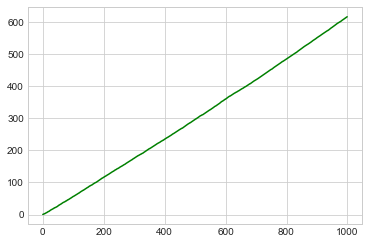

In [815]:
reward_arr = UCB_cumu_reward

plt.plot(reward_arr,color = 'g')
plt.show()

In [816]:
# modified algorithm for comparison
# replace min(1/4, V) with min(1/8, V)

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros((k,), dtype=int) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding the ucb values. we pick the max  
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            #x_i = df.values[t, a] #current reward in round t for arm a
            #for i in range(N[a]):    #check
                #dev = sum((int(df.values[t, a])-int(mu))**2)  #check+
            dev = (df.values[t, a]-mu)**2
            var = dev/(N[a])   #check
            V_i = var + math.sqrt(2*math.log(t)/N[a])
            ucb_value = mu + math.sqrt((math.log(t)/N[a])*min(1/8,V_i))
            UCB_Values[a] = ucb_value     
        elif (N[a] == 0): #if N is 0 for arm a (i.e. a never been pulled), allow arm a to be initialized by setting its UCB to inf.
            UCB_Values[a] = 1e500 #infinity
        
    arm_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

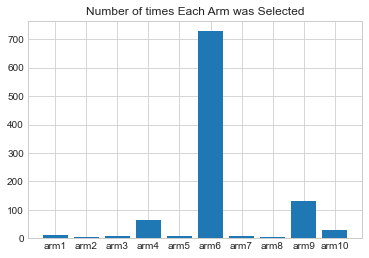

In [817]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

Total regret after N rounds:  32.98907730892961


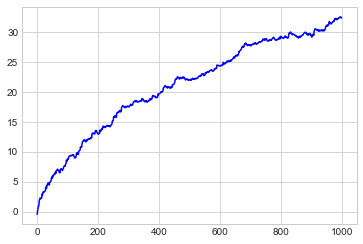

In [818]:
#regret = optimal_arm_mean_reward*t_rounds - ucb_rewards*t_rounds
#NB: with 1/4 replaced by 1/8, the UCB1-Tuned regret is better than UCB1, and 1/8 is better than when 1/4 is used
#clearly logarithmic

regret = 0.7*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr6 = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr6

plt.plot(regret_arr6,color = 'b')
plt.show()

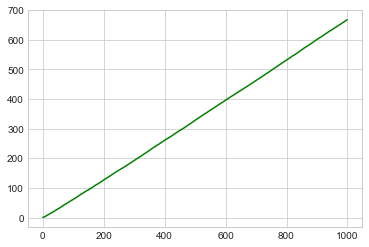

In [819]:
reward_arr6 = UCB_cumu_reward

plt.plot(reward_arr6,color = 'g')
plt.show()

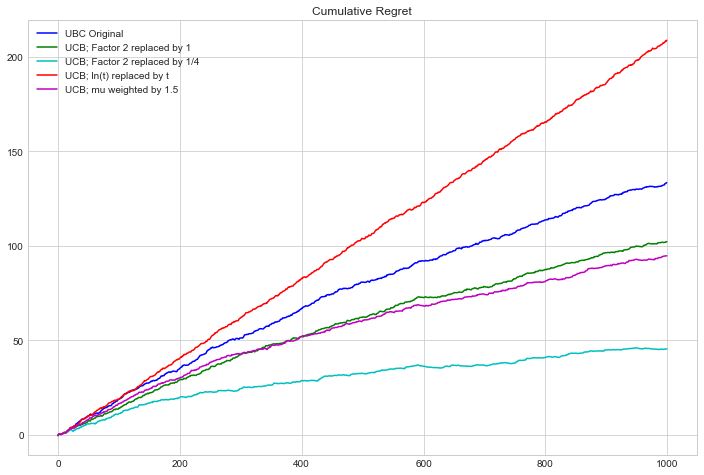

In [120]:
#UCB1 Plots: Regret
#The Regret Plots above all on same set of axes
plt.plot(regret_arr1, label = "UBC Original", color = "b")
plt.plot(regret_arr2, label = "UCB; Factor 2 replaced by 1", color = 'g')
plt.plot(regret_arr2b, label = "UCB; Factor 2 replaced by 1/4", color = 'c')
plt.plot(regret_arr3, label = "UCB; ln(t) replaced by t", color = 'r')
plt.plot(regret_arr3b, label = "UCB; mu weighted by 1.5", color = 'm')

plt.rcParams["figure.figsize"] = (12,8)

plt.title("Cumulative Regret")
plt.legend()
plt.show()

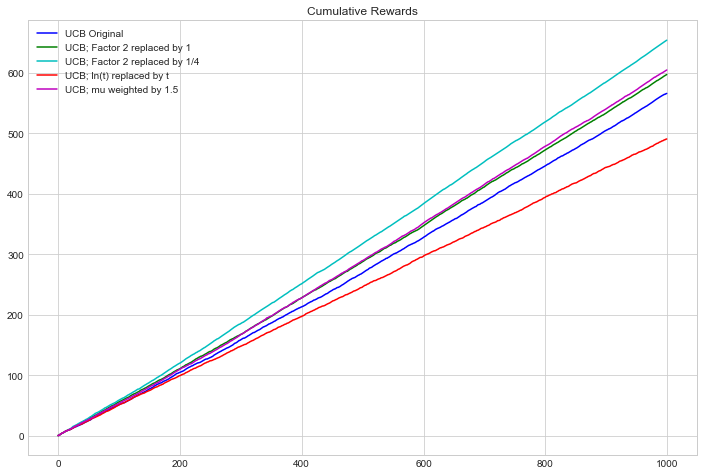

In [121]:
#UCB1 Plots: Reward
#The Reward Plots above all on same set of axes
plt.plot(reward_arr1, label = "UCB Original", color = "b")
plt.plot(reward_arr2, label = "UCB; Factor 2 replaced by 1", color = 'g')
plt.plot(reward_arr2b, label = "UCB; Factor 2 replaced by 1/4", color = 'c')
plt.plot(reward_arr3, label = "UCB; ln(t) replaced by t", color = 'r')
plt.plot(reward_arr3b, label = "UCB; mu weighted by 1.5", color = 'm')

plt.title("Cumulative Rewards")
plt.legend()
plt.show()

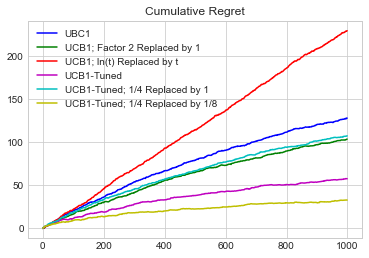

In [824]:
#The Regret Plots above all on same set of axes
plt.plot(regret_arr1, label = "UBC1", color = "b")
plt.plot(regret_arr2, label = "UCB1; Factor 2 Replaced by 1", color = 'g')
plt.plot(regret_arr3, label = "UCB1; ln(t) Replaced by t", color = 'r')
plt.plot(regret_arr4, label = "UCB1-Tuned", color = 'm')
plt.plot(regret_arr5, label = "UCB1-Tuned; 1/4 Replaced by 1", color = 'c')
plt.plot(regret_arr6, label = "UCB1-Tuned; 1/4 Replaced by 1/8", color = 'y')
plt.title("Cumulative Regret")
plt.legend()
plt.show()

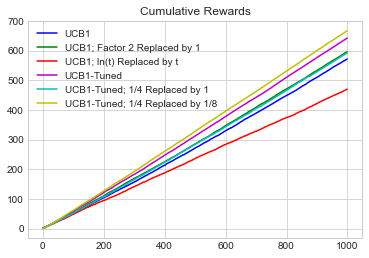

In [825]:
#The Reward Plots above all on same set of axes
plt.plot(reward_arr1, label = "UCB1", color = "b")
plt.plot(reward_arr2, label = "UCB1; Factor 2 Replaced by 1", color = 'g')
plt.plot(reward_arr3, label = "UCB1; ln(t) Replaced by t", color = 'r')
plt.plot(reward_arr4, label = "UCB1-Tuned", color = 'm')
plt.plot(reward_arr5, label = "UCB1-Tuned; 1/4 Replaced by 1", color = 'c')
plt.plot(reward_arr6, label = "UCB1-Tuned; 1/4 Replaced by 1/8", color = 'y')
plt.title("Cumulative Rewards")
plt.legend()
plt.show()

#### Epsilon-Greedy

In [750]:
# original algorithm
# note: Epsilon-Greedy has linear regret
# choose the best arm with probability (1 - 𝜀)
# randomly choose any arm out of the k arms with probability (𝜀)
#𝜀 = 0.05

arr1 = np.arange(0.0, 1.1, 0.01)

for i in range(100):
    cur = np.random.choice(arr1)

    if cur < 0.96:    #prob 1-𝜀 = 0.95
        arm_chosen = max(sample_result)  
        print("result of arm_chosen: ", arm_chosen)
    else:             #prob 𝜀 = 0.05
        arm_chosen = np.random.choice(sample_result)
        print("result of arm_chosen: ", arm_chosen)
    sample_result = np.append(sample_result, arm_chosen)



result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  0.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
result of arm_chosen:  1.0
r

In [751]:
# original algorithm, 100 runs
# note: Epsilon-Greedy has linear regret
N=100
round_t = list(range(1,N+1))
lower, upper = 0, 1

a1 = scipy.stats.truncnorm.rvs((lower-0.5)/0.2,(upper-0.5)/0.2,loc=0.5,scale=0.2,size=N)    #mu, sigma = 0.5, 0.2
a2 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a3 = scipy.stats.truncnorm.rvs((lower-0.4)/0.1,(upper-0.4)/0.1,loc=0.4,scale=0.1,size=N)    #mu, sigma = 0.4, 0.1
a4 = scipy.stats.truncnorm.rvs((lower-0.6)/0.2,(upper-0.6)/0.2,loc=0.6,scale=0.2,size=N)    #mu, sigma = 0.6, 0.2
a5 = scipy.stats.truncnorm.rvs((lower-0.5)/1,(upper-0.5)/1,loc=0.5,scale=1,size=N)          #mu, sigma = 0.5, 1
a6 = scipy.stats.truncnorm.rvs((lower-0.7)/0.08,(upper-0.7)/0.08,loc=0.7,scale=0.08,size=N) #mu, sigma = 0.7, 0.08
a7 = scipy.stats.truncnorm.rvs((lower-0.4)/0.01,(upper-0.4)/0.01,loc=0.4,scale=0.01,size=N) #mu, sigma = 0.4, 0.01
a8 = scipy.stats.truncnorm.rvs((lower-0.2)/0.2,(upper-0.2)/0.2,loc=0.2,scale=0.2,size=N)    #mu, sigma = 0.2, 0.2
a9 = scipy.stats.truncnorm.rvs((lower-0.65)/0.007,(upper-0.65)/0.007,loc=0.65,scale=0.007,size=N)#mu, sigma = 0.65, 0.007
a10 = scipy.stats.truncnorm.rvs((lower-0.6)/0.9,(upper-0.6)/0.9,loc=0.6,scale=0.9,size=N)   #mu, sigma = 0.6, 0.9

df = pd.DataFrame({"round":round_t, "arm1":a1,"arm2":a2,"arm3":a3,"arm4":a4,"arm5":a5,"arm6":a6,"arm7":a7,"arm8":a8,"arm9":a9,"arm10":a10})
df.head() #.head() just shows first 5 rows


,round,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,arm9,arm10
0,1,0.409607,0.134202,0.200534,0.808013,0.445431,0.570933,0.393759,0.238609,0.643407,0.432118
1,2,0.444608,0.234435,0.594262,0.819235,0.905727,0.694830,0.387362,0.388336,0.646605,0.393159
2,3,0.815561,0.105063,0.391907,0.526244,0.687085,0.798920,0.413851,0.311941,0.649604,0.700732
3,4,0.683433,0.059376,0.334223,0.865973,0.218583,0.617162,0.400458,0.357016,0.649698,0.145040
4,5,0.652880,0.078708,0.437341,0.698538,0.301579,0.857657,0.404044,0.530676,0.651725,0.733055


In [752]:
np.random.choice([0,2,4,6,8,9])
np.argmax([0,2,9,4,6,8,9])

2

In [753]:
e = 0.05 #epsilon: 0.05
rounds = len(df.index)
k = 10 # number of arms
indexArr = np.arange(k)
N = np.zeros((k,), dtype=int) #number of times given arm has been selected
rewardSum = np.zeros(k)

hist_t = [] #stores history of ln for each round t
hist_EG_rewards = [] #stores history of EG CHOSEN rewards

for t in range(rounds):
    EG_Values = np.zeros((k,), dtype=int) #array holding the EG values
    arm_selected = 0
    prob = np.random.random()
    for a in range(k):
        if (N[a]==0):
            arm_selected = a
        elif (N[a]>0):
            if prob <= 1-e:
                arm_selected = np.argmax(EG_Values) #NB: argmax gives index of max value in a list/array
            else:
                arm_selected = np.random.choice(indexArr)
        a += 1
    
    #update Values as of round t
    N[arm_selected] += 1
    reward = df.values[t, arm_selected+1]
    rewardSum[arm_selected] += reward
    hist_EG_rewards.append(reward)
    EG_cumu_reward = np.cumsum(hist_EG_rewards)
    EG_total_reward = sum(hist_EG_rewards)


Text(0.5, 1.0, 'Number of times Each Arm was Selected')

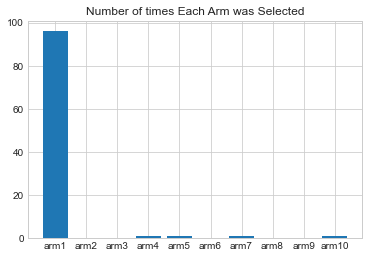

In [754]:
plt.bar(['arm1','arm2','arm3','arm4','arm5','arm6','arm7','arm8','arm9','arm10'], N)
plt.title("Number of times Each Arm was Selected")

In [755]:
# original algorithm
# 𝜀 = 0.4

# arr1 = np.arange(0.1, 1.1, 0.01)

# for i in range(100):
#     cur = np.random.choice(arr1)

#     if cur < 0.7:    #prob 1-𝜀 = 0.6
#         arm_chosen = max(sample_result)  

#         print("result of arm_chosen: ", arm_chosen)
#     else:             #prob 𝜀 = 0.4
#         arm_chosen = np.random.choice(sample_result)
#         print("result of arm_chosen: ", arm_chosen)


#### Pursuit

In [2]:
# original algorithm
# beta = 1
...


In [3]:
# original algorithm
# beta = 0
...

In [3]:
# original algorithm
# beta = 0.5
...

#### Softmax (Boltzmann Exploration)

In [ ]:
# original algorithm
# tau controls the randomness of choice
...

In [ ]:
# modified algorithm for comparison
# try small tau-value
...

In [ ]:
# modified algorithm for comparison
# try large tau-value
...

In [ ]:
# modified algorithm for comparison
# replace e with 3
...

In [ ]:
# modified algorithm for comparison
# replace µ with µ^2
...

#### Reinforcement Comparison

In [2]:
# original algorithm
# what are the bounds of π?
# π = 1
...


In [3]:
# original algorithm
# π = 0.05
...

In [3]:
# original algorithm
# π = 0.3
...

#### Thompson Sampling

In [ ]:
# original algorithm
...

In [ ]:
# modified algorithm for comparison
...